05월 09일 학습내용 이어서 10일까지

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

#boston 데이터셋 DataFrame변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston dataset의 target array는 주택 가격
#이를 컬럼 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)
bostonDF

Boston 데이터셋 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


CRIM : 지역별 점외 발생률  
ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
NDUS : 비상업 지역 넓이 비율  
CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)  
NOX : 일산화질소 농도  
RM : 거주할 수 있는 방 개수  
AGE : 1940년 이전에 건축된 소유 주택의 비율  
DIS : 5개 주요 고용센터까지의 가중거리  
RAD : 고속도로 접근 용이도  
TAX : 10,000 달러당 재산세율  
PTRATIO : 지역의 교사와 학생 수 비율  
B : 지역의 흑인 거주 비율  
LSTAT : 하위 계층의 비율  
MEDV : 본인 소유의 주택가격(중앙값)  

In [514]:
fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
#fig와 axs는 두 개의 변수를 할당하고 있습니다. fig는 figure 객체이고, axs는 axes 객체입니다.
# fig, axs 변수는 2x4 크기의 서브 플롯을 생성합니다.
# figsize는 그림의 크기를 지정하는 인자입니다. ncols는 열의 개수를, nrows는 행의 개수를 결정합니다.
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
# lm_features는 다중선형회귀에서 사용할 변수들을 리스트로 저장한 것입니다.
# 이 변수들은 주택가격 예측 모델에서 독립변수로 사용됩니다.
for i,feature in enumerate(lm_features): 
    row = int(i/4)
    col = i%4
# for문은 lm_features에 저장된 변수들을 차례로 꺼내와 sns.regplot을 이용해 산점도와 회귀 직선을 함께 그립니다.
# enumerate 함수는 리스트를 인덱스와 함께 반환해주는 함수입니다.
# row와 col은 현재 변수의 인덱스를 이용하여 해당 서브 플롯의 위치를 계산합니다.
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직성을 함께 표현
    sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])
# sns.regplot은 seaborn 패키지에서 제공하는 산점도와 회귀 직선을 그리는 함수입니다.
# x와 y는 각각 독립변수와 종속변수를 지정하며, data는 데이터 프레임을 지정합니다.
# ax는 해당 서브 플롯을 지정합니다
    # 펼치지 않고 4개, 2개  픽스해두고 그리는 것
    
"""fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)는
matplotlib의 subplots 메서드를 사용하여 그래프를 만들고,
axs 변수에 4개의 열과 2개의 행으로 나누어진 그래프 공간을 할당합니다.
figsize 인자는 전체 그래프의 크기를 지정합니다.

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']는
주어진 데이터 프레임에서 사용할 변수의 이름을 리스트 형태로 지정합니다.

for i,feature in enumerate(lm_features):는
lm_features 리스트에 있는 변수들을 반복적으로 불러옵니다.
i는 인덱스 번호를 나타내며, feature는 해당 변수의 이름을 나타냅니다.

row = int(i/4)와 col = i%4는
axs 변수에서 해당 그래프가 위치할 행과 열의 인덱스를 계산합니다.

sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])는
seaborn 라이브러리의 regplot 메서드를 사용하여 산점도와 회귀선을 그립니다.
x 인자는 x축에 사용할 변수를, y 인자는 y축에 사용할 변수를 지정합니다.
data 인자는 사용할 데이터프레임을 지정하며, ax 인자는 해당 그래프를 그릴 위치를 지정합니다.
이렇게 그려진 그래프들은 axs 변수에 할당된 공간에 하나씩 차례로 채워집니다.
"""

"fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)는\nmatplotlib의 subplots 메서드를 사용하여 그래프를 만들고,\naxs 변수에 4개의 열과 2개의 행으로 나누어진 그래프 공간을 할당합니다.\nfigsize 인자는 전체 그래프의 크기를 지정합니다.\n\nlm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']는\n주어진 데이터 프레임에서 사용할 변수의 이름을 리스트 형태로 지정합니다.\n\nfor i,feature in enumerate(lm_features):는\nlm_features 리스트에 있는 변수들을 반복적으로 불러옵니다.\ni는 인덱스 번호를 나타내며, feature는 해당 변수의 이름을 나타냅니다.\n\nrow = int(i/4)와 col = i%4는\naxs 변수에서 해당 그래프가 위치할 행과 열의 인덱스를 계산합니다.\n\nsns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])는\nseaborn 라이브러리의 regplot 메서드를 사용하여 산점도와 회귀선을 그립니다.\nx 인자는 x축에 사용할 변수를, y 인자는 y축에 사용할 변수를 지정합니다.\ndata 인자는 사용할 데이터프레임을 지정하며, ax 인자는 해당 그래프를 그릴 위치를 지정합니다.\n이렇게 그려진 그래프들은 axs 변수에 할당된 공간에 하나씩 차례로 채워집니다.\n"

Error in callback <function flush_figures at 0x00000144997388B0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

#linear Regression OLS(ordinary Least Square(OLS) method)
#error function을 gradient method로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print("절편 값:", lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

절편 값: 40.995595172164435
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
sns.set_theme(style='darkgrid')
tips=sns.load_dataset('tips')
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


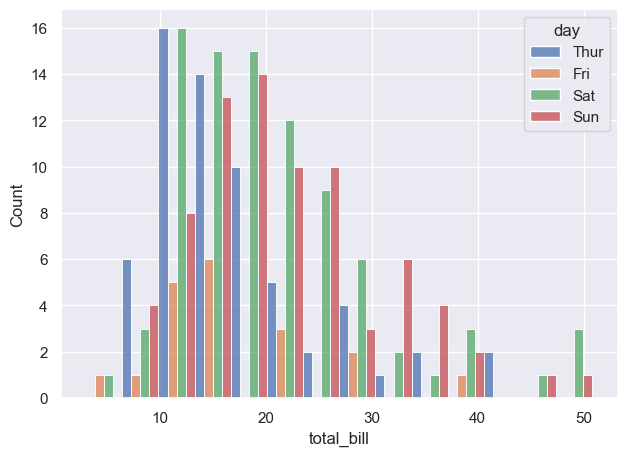

In [ ]:
ax=sns.histplot(data=tips, x="total_bill", multiple='dodge', hue='day')

- 우리는 과적합(overfitting)을 방지하는 것이 중요하다.
    - 과적합이란 train에서 성능이 좋고 Test에서 성능이 좋지 않은 것이다.
    -  학습 데이터셋에 지나치게 최적화하여 발생하는 문제,  
        모델을 지나치게 복잡하게 학습하여 학습 데이터셋에서는 모델 성능이 높게 나타나지만 정작 새로운 데이터가 주어졌을 때 정확한 예측/분류를 수행하지 못합


    - 과소적합(underfitting) : 과적합의 반대 : 머신러닝 모델이 충분히 복잡하지 않아(최적화가 제대로 수행되지 않아)  
        학습 데이터의 구조/패턴을 정확히 반영하지 못하는 문제

- 회귀모델 평가지표
    - (빈 칸 서술)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression() # 선형회귀 모델을 구현할 때 사용되는 클래스

# K-Fold Cross validation
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함. 
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring ='neg_mean_squared_error')로 반환된 값은 모두 음수
#회귀의 값은 작아지면 좋으니깐 마이너스를 취하면 작으면 작아지는게 좋음
print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 scores: {0:.3f}'.format(avg_rmse))


5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 scores: 5.829


In [ ]:
import pandas as pd
train = pd.read_csv("C:/Users/5/My_Study/train.csv")
test = pd.read_csv("C:/Users/5/My_Study/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


탐색적 자료 분석(Exploratory Data Anlysis(EDA))
- Survived : 생존=1, 죽음=0
- Pclass : 승객 등급, 1등급=1, 2등급=2, 3등급=3
- SibSp : 함께 탑승한 배우자 또는 형제의 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Tickey : 티켓 번호
- Cabin : 선실 번호
- Embarked : 탑승 장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [ ]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
train[train['Survived']==1]['Sex'] # 1 True

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [ ]:
train[train['Survived']==1]['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

line : 선 그래프 (기본 값)  
bar : 수직 막대 그래프  
barh : 수평 막대 그래프  
hist : 히스토그램  
box : 박스 플롯  
kde : 커널 밀도 그래프  
density : 밀도 그래프  
area : 면적 그래프  
pie : 파이 그래프  
scatter : 산점도 그래프  
hexbin : 고밀도 산점도 그래프

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() # 생존자 카운트
    dead = train[train['Survived']==0][feature].value_counts() # 사망자 카운트
    df = pd.DataFrame([survived,dead]) # [생존자, 사망자]를 DataFrame
    df.index = ['Survived', 'Dead'] # index화
    df.plot(kind='bar', stacked=True, figsize=(10,5)) # 그림 그림


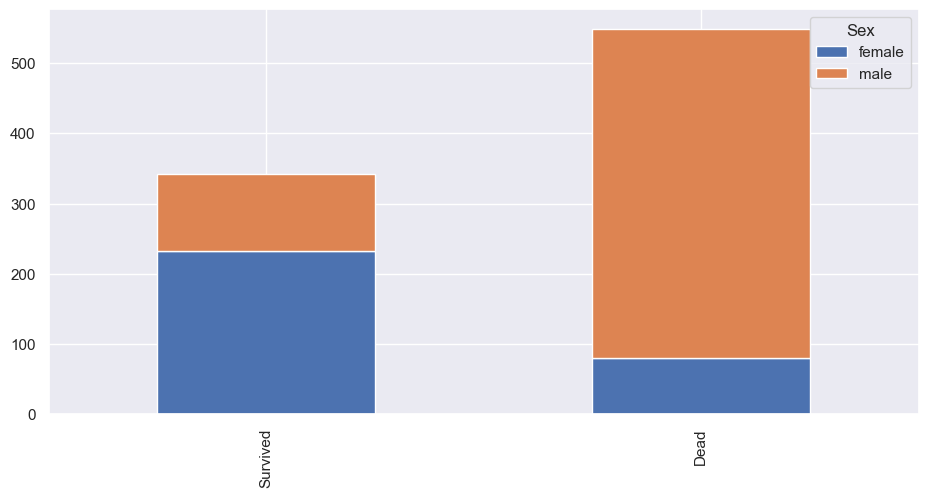

In [ ]:
bar_chart('Sex') # 무슨 이유로 남자들이 사망 했을까?

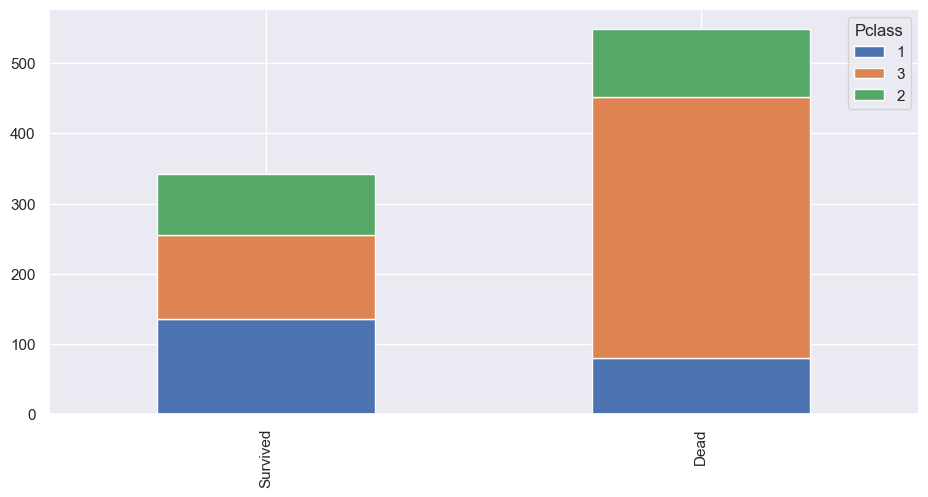

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() # 생존자 카운트
    dead = train[train['Survived']==0][feature].value_counts() # 사망자 카운트
    df = pd.DataFrame([survived,dead]) # [생존자, 사망자]를 DataFrame
    df.index = ['Survived', 'Dead'] # index화
    df.plot(kind='bar', stacked=True, figsize=(10,5)) # 그림 그림
bar_chart('Pclass')

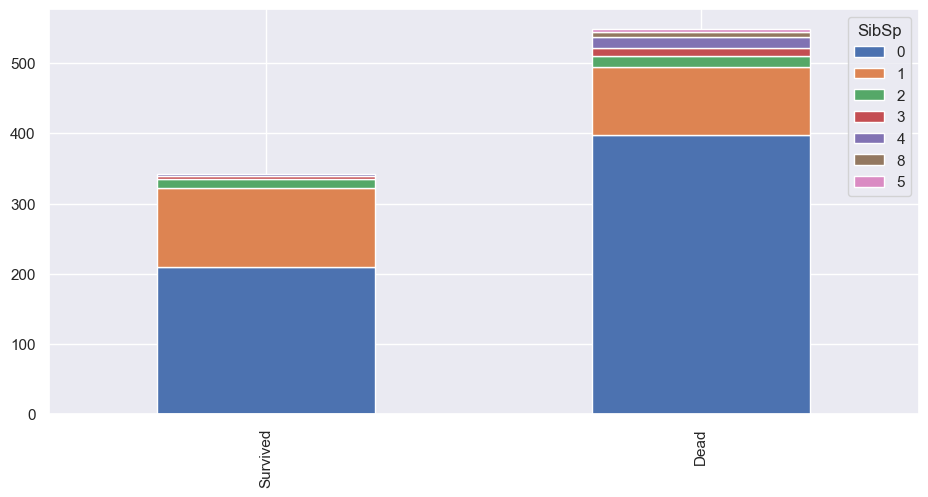

In [ ]:
bar_chart('SibSp')

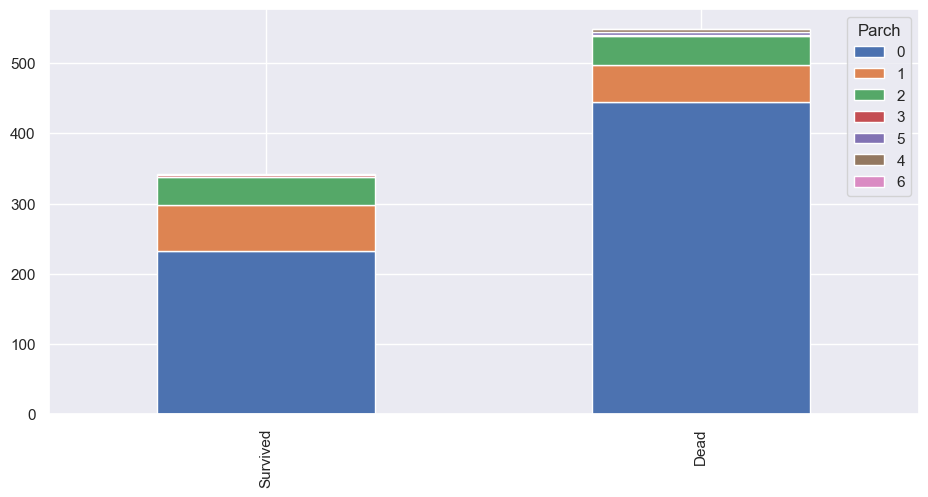

In [ ]:
bar_chart('Parch')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

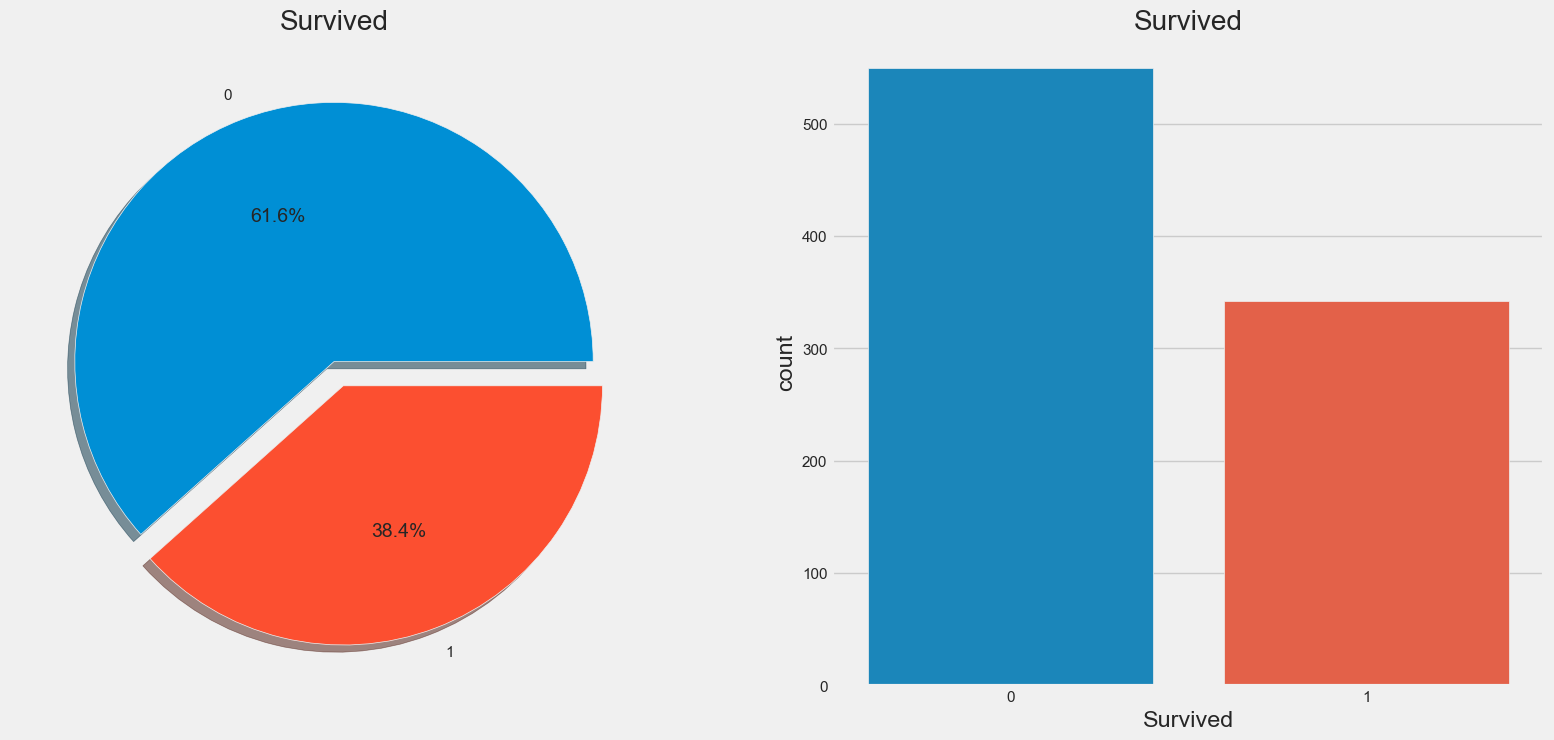

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#exploed : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄
#autopct : 각 항목의 퍼센트를 표시함.
#shadow : 그림자 on,off (True = on)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=train['Survived'],ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
# !pip install Jinja2

In [ ]:
# !conda install jinja2


In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


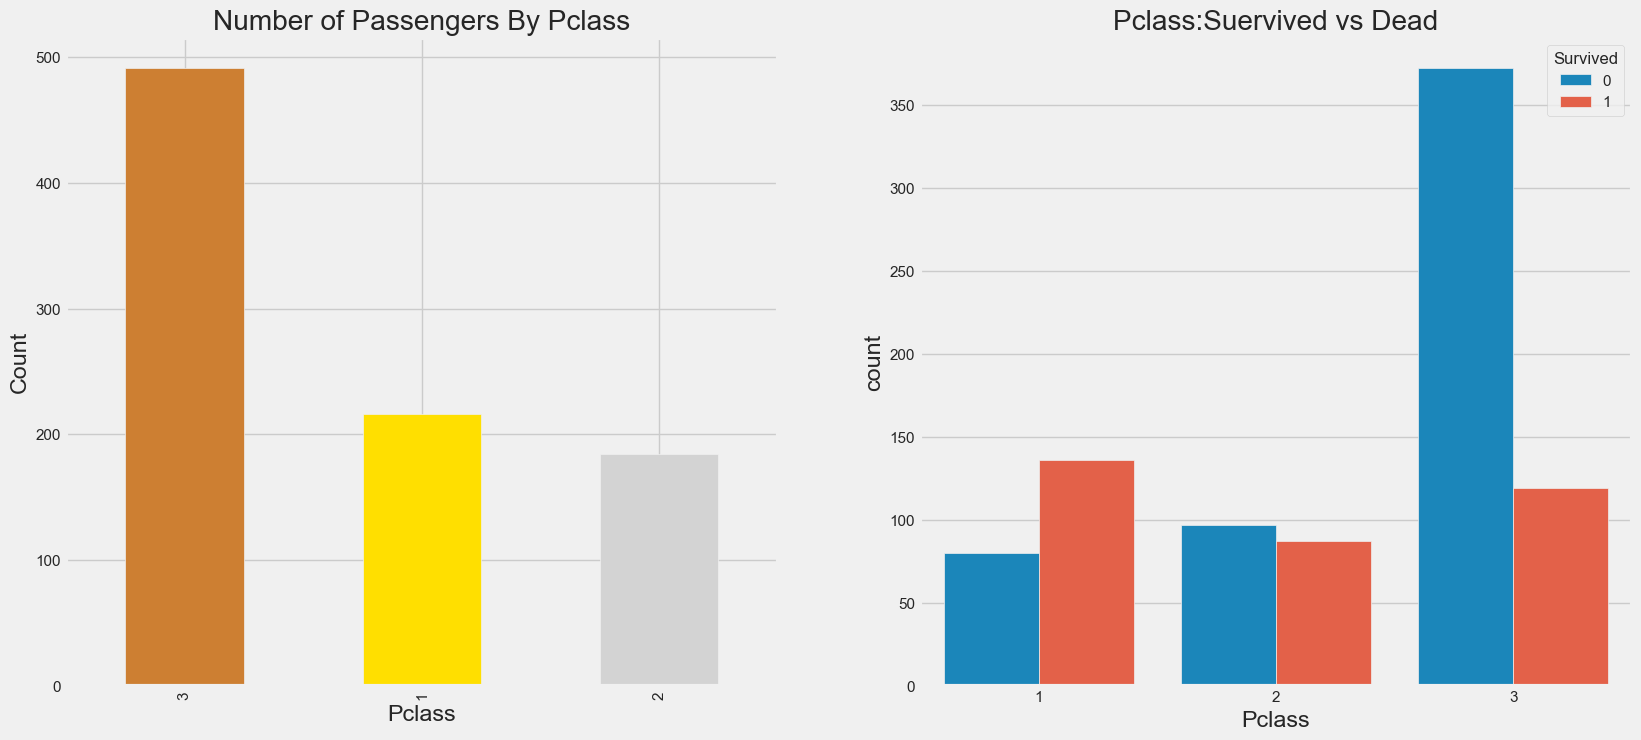

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass:Suervived vs Dead')
plt.show()

In [ ]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


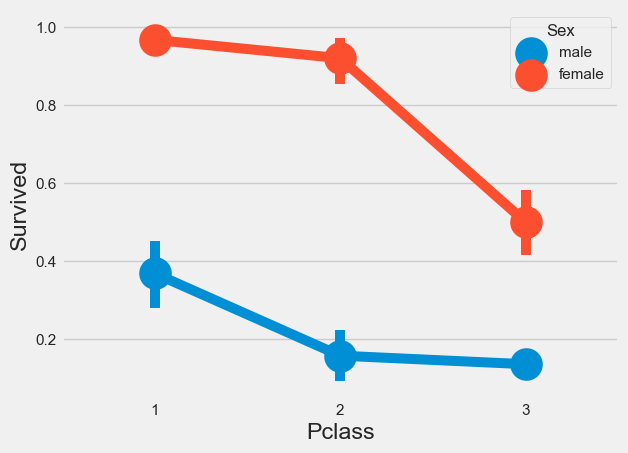

In [ ]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.show()

In [ ]:
print('Oldest Passeneger was of :', train['Age'].max(), 'Years')
print('Youngest Passeneger was of :', train['Age'].min(), 'Years')
print('Average Age on the ship :', train['Age'].mean(), 'Years') # 평균
print('Median Age on the ship :', train['Age'].median(), 'Years') # 중위수 (중앙)
print('Mode Age on the ship :', train['Age'].mode(), 'Years') # 최빈 값, 가장 빈도가 높은 값


Oldest Passeneger was of : 80.0 Years
Youngest Passeneger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years
Median Age on the ship : 28.0 Years
Mode Age on the ship : 0    24.0
Name: Age, dtype: float64 Years


In [ ]:
(train['Age'] == 0).sum()

0

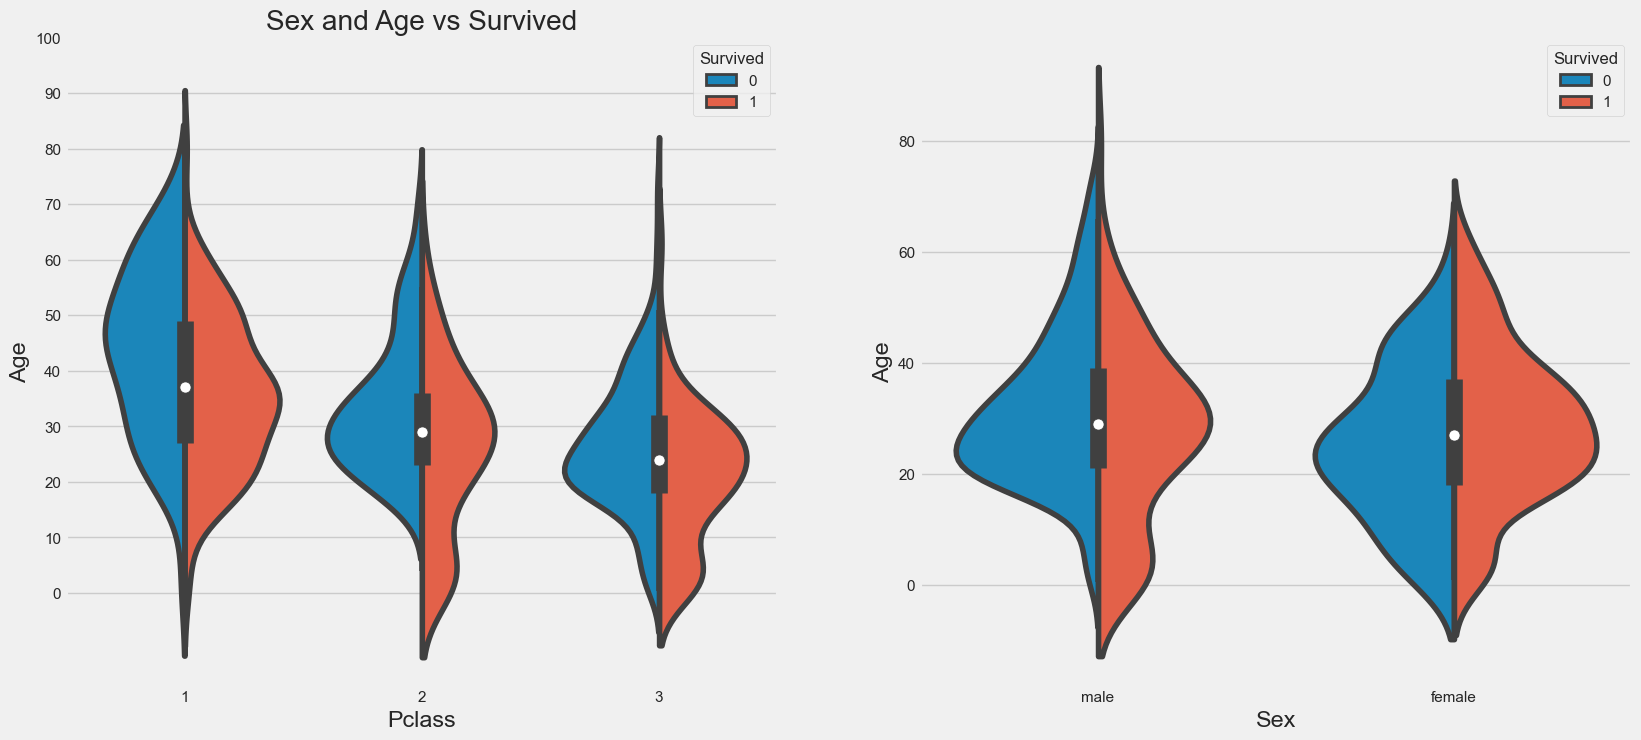

In [ ]:
f,ax= plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data= train, split= True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data= train, split=True, ax=ax[1])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Name'].str

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#[A-Za-z]+)\. : 정규표현식(regular expression)
# -> 규칙 : 대문자나 소문자로 시작하다가 .으로 끝나면 추출해주세요.


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
train_test_data=[train,test]
# Name에 따라서 뭐가 다른가? -> 전에 각각 해당하는 value를 count를 함.
for dataset in train_test_data:
    dataset['Title']=train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
# extract('(A-Za-z)+)\.     > 정규표현식
# /.은 .을 추출 A-Za-z+ 는
# A-Z와 a-Z를 찾아서 어느 지점에서 끝내는가?  .를 기준으로 자르라는 이야기 그 다음 count

([A-Za-z]+)는 정규표현식에서  
알파벳 대문자 A부터 Z까지와 알파벳 소문자 a부터 z까지를 표현하며,  
+는 1개 이상의 반복을 의미합니다.  
따라서 ([A-Za-z]+)는 알파벳 대소문자로 이루어진 1개 이상의 문자열을 의미합니다.  

예를 들어, "Hello World!"라는 문자열에서 ([A-Za-z]+)를 적용하면  
"Hello"와 "World" 두 개의 문자열을 추출할 수 있습니다.

In [ ]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
s2=pd.Series(['a_b_c','c_d_e', np.nan, 'f_g_h'], dtype='string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [ ]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [ ]:
s2.str.split('_').get(1)

['c', 'd', 'e']

- 방금 저장된 리스트 중에서 몇번째를 추출할 것인지를 정하려면
    get 또는 []를 사용해서 지정할 수 있다. get()이나[]이나 결과는 같음

In [ ]:
s2.str.split('_')[1]

['c', 'd', 'e']

In [ ]:
s2.str.split('_',expand=True) # 데이터프레임 형식으로 확장

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [ ]:
s2.str.split('_', expand=False)

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [ ]:
s2.str.split('_', expand=True, n=1)

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


In [ ]:
s2.str.split('_', expand=True, n=2)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


feature를 사용하려면 해당 데이터를 pandas DataFrame 형태로 불러와야 함

titanic = pd.read_csv('titanic.csv')
데이터셋에서 사용할 feature를 선택하고 이를 새로운 DataFrame으로 저장할 수 있습니다.  
예를 들어, 'Age', 'Sex', 'Pclass' feature를 선택하여 새로운 DataFrame으로  
저장하고자 할 때는 다음과 같이 작성할 수 있습니다.

selected_features = ['Age', 'Sex', 'Pclass']  
titanic_features = titanic[selected_features]  

위 코드는 titanic 데이터셋에서 'Age', 'Sex', 'Pclass' feature만을 선택하여  
새로운 DataFrame인 titanic_features를 생성합니다.  
이제 이를 기반으로 데이터 분석을 시작할 수 있습니다.

- one-hot encoding

In [ ]:
# 극단적으로 나눔.
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
    dataset['Title']= dataset['Title'].map(title_mapping) # 모든 피쳐에 적용해주세요

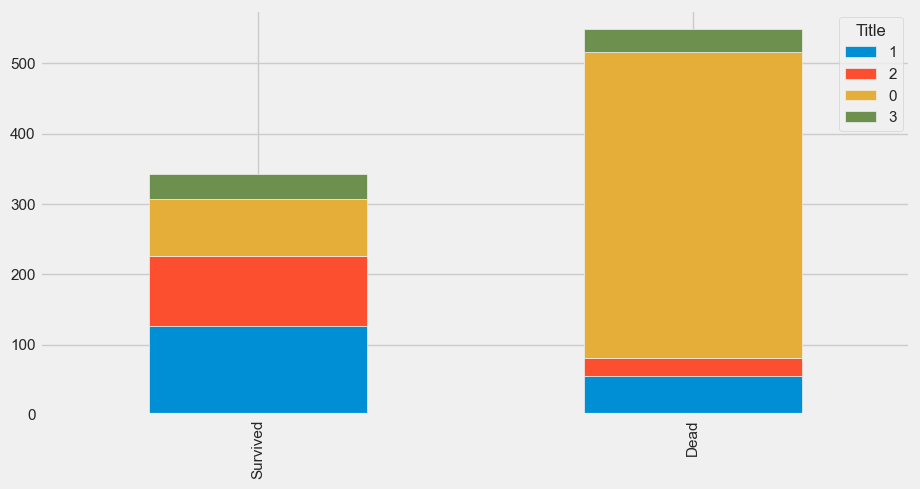

In [ ]:
bar_chart('Title')

In [ ]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
# method : sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

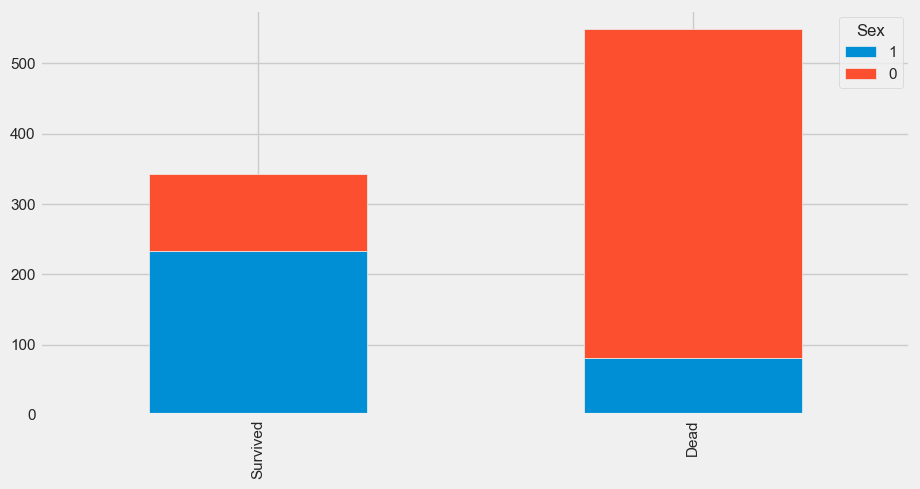

In [ ]:
bar_chart('Sex')

In [ ]:
pd.crosstab(train['Title'],train['Sex'])

Sex,0,1
Title,,
0,517,0
1,0,182
2,0,125
3,60,7


- 결측치 처리
- it_transform()은 training data에만 사용,  transfrom은 test data에만 사용

In [ ]:
# missing Age를 각 Title에 대한 연령의 중간 값으로 채움(Mr, Mrs, Miss, others) inplace는 채울지 여부
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

# train에 결측치를 처리했다면, test에도 똑같이 처리해야함.
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)
                   

In [ ]:
train['Age'].isna().sum() # 결측치를 처리하고 꼭 다시 확인

0

In [ ]:
train[['Title', 'Age']].groupby(['Title'], as_index= False).mean()
# as_index True하면 Title이 index가 되어버림

,Title,Age
0,0,31.823017
1,1,21.620879
2,2,35.776000
3,3,19.577164


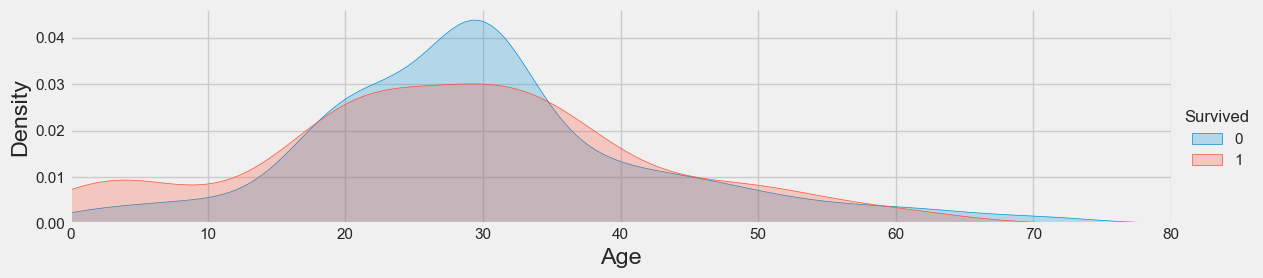

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 변수의 분포를 시각화 하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할 때 유용함
# FeactGrid는 Colum, row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능
# aspect : subplot의 새로 대비 가로 비율
facet = sns.FacetGrid(train, hue= 'Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show() # 20-30대 사망률이 > 생존율보다 왜 높을까?

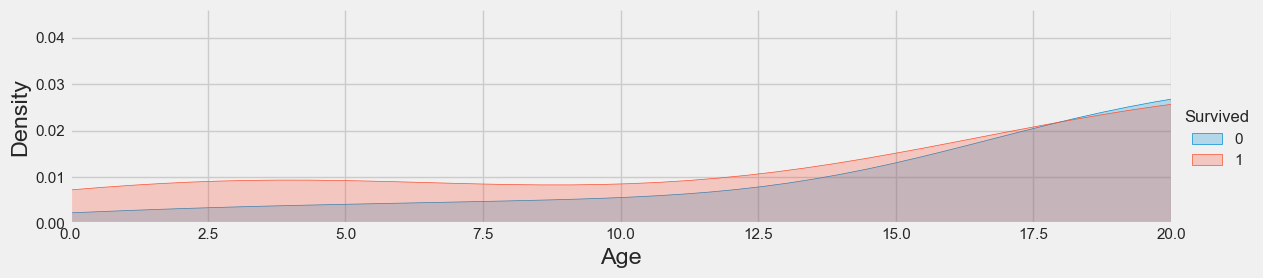

In [ ]:
facet = sns.FacetGrid(train, hue= 'Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(0,20) # 0~20대
plt.show() 

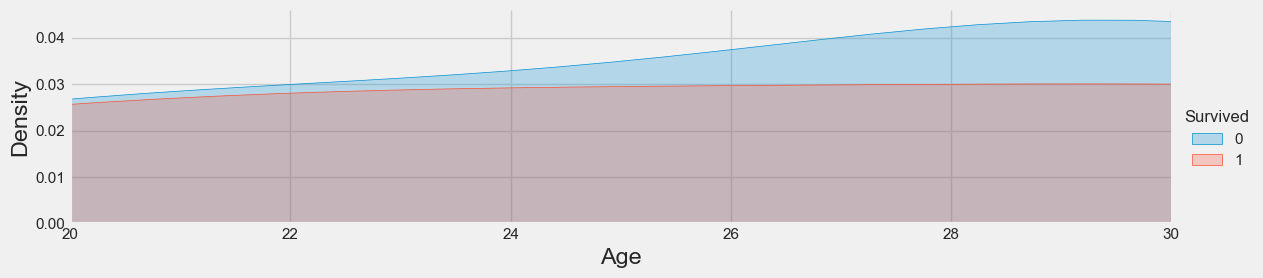

In [ ]:
facet = sns.FacetGrid(train, hue= 'Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30) # 20~30대
plt.show()

0~80세까지 들어있음. 너무 많다.  
Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)


잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로  
이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [ ]:
# for dataset in train_test_data:
#     dataset.loc[dataset['Age']<=16, 'Age']=0,
#     dataset.loc[(dataset['Age']>16) and (dataset['Age']<=26),'Age']=1
    
# for문 첫줄 마지막 , 빼야함. 안그럼 이어진 것으로 인식
# and는 안됨 &로 해야함 ??

↑ 컴마로 연결을 해버리니깐, multi index로 받아들여서 동시에 처리가 안됨

In [1]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1

NameError: name 'train_test_data' is not defined

In [2]:
for dataset in train_test_data: 
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

NameError: name 'train_test_data' is not defined

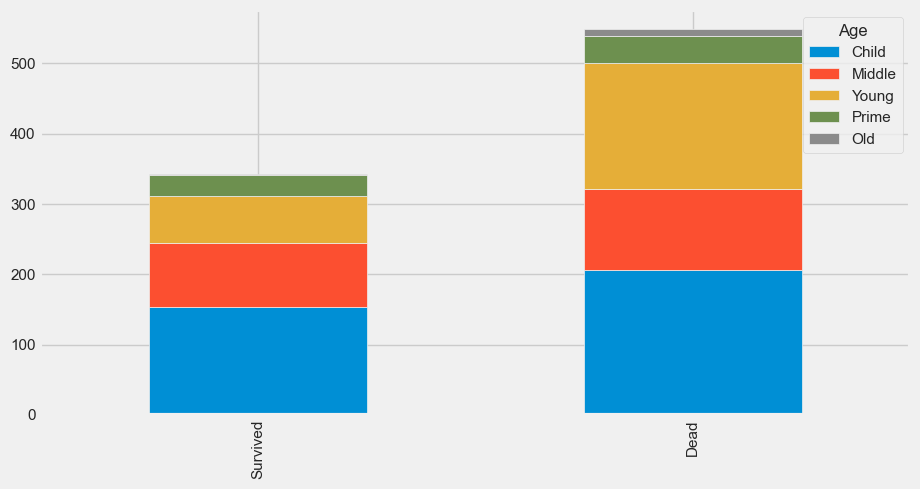

In [ ]:
bar_chart('Age')

- FamaliySiz
    - 함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수
    - 혼자 탑승한 것과 가족들이랑 탑승한 것은 어떻게 다를까?
    - SibSp + Parch

In [ ]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1
train['FamilySize'] = train['SibSp']+train['Parch']+1
# 솔로일 가능성이 있기 때문에 1을 더함, 이유는 Python은 0부터 숫자를 세기 때문 

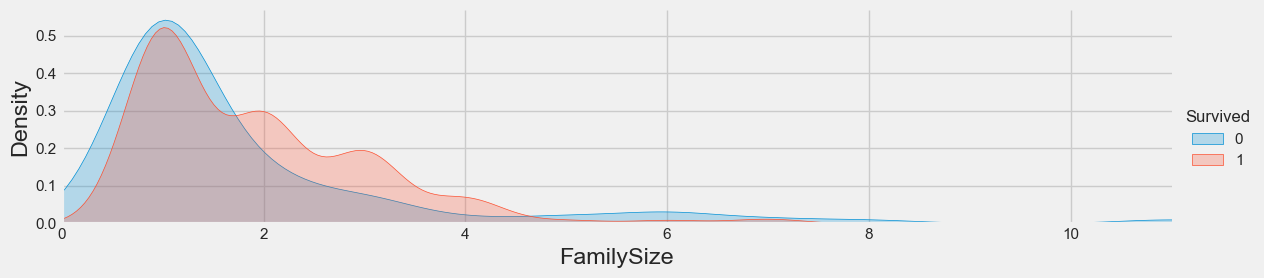

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자일 경우는 사망률, 생존률이 높음

In [ ]:
X_train = train.drop(['Survived', 'PassengerId'],axis=1)
y_train= train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

In [ ]:
X_train # drop 확인.

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Braund, Mr. Owen Harris",0,Child,1,0,A/5 21171,7.2500,NaN,S,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,2,2
2,3,"Heikkinen, Miss. Laina",1,Child,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,2,2
4,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,3,1
887,1,"Graham, Miss. Margaret Edith",1,Child,0,0,112053,30.0000,B42,S,1,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Child,1,2,W./C. 6607,23.4500,NaN,S,1,4
889,1,"Behr, Mr. Karl Howell",0,Child,0,0,111369,30.0000,C148,C,0,1


In [ ]:
X_test.isna().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [ ]:
X_test['Fare'].fillna(0,inplace=True)

In [ ]:
# One-Hot Encoding
X_train.drop('Name',axis=1, inplace=True)
X_test.drop('Name',axis=1, inplace=True)

In [ ]:
# OneHot Encoding이 힘들어서 우선 포기
X_train.drop('Ticket',axis=1, inplace=True)
X_test.drop('Ticket', axis=1, inplace=True)

In [ ]:
# OneHot Encoding이 힘들어서 우선 포기
X_train.drop('Cabin',axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)

In [ ]:
# OneHot Encoding이 힘들어서 우선 포기
X_train.drop('Age',axis=1, inplace=True)
X_test.drop('Age', axis=1, inplace=True)

In [ ]:
# OneHot Encoding이 힘들어서 우선 포기
X_train.drop('Title',axis=1, inplace=True)
X_test.drop('Title', axis=1, inplace=True)

In [ ]:
# OneHot Encoding이 힘들어서 우선 포기
X_train.drop('Embarked',axis=1, inplace=True)
X_test.drop('Embarked', axis=1, inplace=True)

KeyError: "['Embarked'] not found in axis"

In [ ]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,FamilySize
0,3,0,1,0,7.2500,2
1,1,1,1,0,71.2833,2
2,3,1,0,0,7.9250,1
3,1,1,1,0,53.1000,2
4,3,0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,1
887,1,1,0,0,30.0000,1
888,3,1,1,2,23.4500,4
889,1,0,0,0,30.0000,1


In [ ]:
from sklearn.linear_model import LinearRegression
# 데이터가 정렬되어 있을 경우도 있기 때문에 데이터를 shuffle 해줌.
from sklearn.utils import shuffle

lig_reg = LinearRegression()
lig_reg.fit(X_train,y_train)

lig_reg.score(X_train,y_train)

0.3744982348875002

In [ ]:
y_pred = lig_reg.predict(X_test)

df1 = pd.DataFrame(y_pred)
df1

,0
0,0.113353
1,0.606261
2,0.251976
3,0.113756
4,0.596279
...,...
413,0.113460
414,0.963713
415,0.113073
416,0.113460


- 당뇨병 예측하기.

In [515]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes


- age : 나이
- sex : 성별
- bmi : 체질량지수
- bp : 평균혈압
- s1 : 혈중 총 콜레스테롤
- s2 : 저밀도 지질단백질
- s2 : 고밀도 지질단백질
- s4 : 총 콜레스테롤 수치
- s5 : 혈중 트리글리세라이드 수치
- s6 : 혈당수치

In [585]:
diabetes= load_diabetes() # 1. 데이터를 받고
print(diabetes.data.shape, diabetes.target.shape)
# diabetes.data 배열의 크기(shape) (n_samples, n_features) 형태
# n_samples는 데이터 샘플의 개수
# n_features는 각 데이터 샘플에서 측정한 특징(feature)의 개수

# diabetes.target 배열의 크기(shape)를 나타내며, (n_samples,) 형태
# diabetes.target 배열이 1차원 배열이며,  
# 각 원소가 하나의 데이터 샘플의 당뇨병 진행도 수치를 나타내고 있다는 것을 의미


# diabetes.data는 442명의 당뇨 환자들에 대한 측정치를 담고 있는 데이터 
# 10개의 특성(feature)에 대한 정보가 각 환자마다 저장되어 있음

# diabetes.target은 각 환자의 당뇨 진행 상태를 나타내는 데이터
# 이진 분류 문제로 구성되어 있음

# target 값이 0인 경우는 당뇨 진행이 나아졌음을, 1인 경우는 당뇨 진행이 악화.



# diabetes.data는 당뇨병 환자들의 10개의 특성(feature)을 담고 있는 데이터이며,
# diabetes.target은 해당 환자의 당뇨병 진행 상황을 나타내는 target 값입니다.
# 이 둘의 shape을 출력한 결과 (442, 10)과 (442,)로 나타나는데,
# 이는 각각 442개의 샘플과 10개의 특성(feature)이 있는 데이터와
# 442개의 샘플과 1개의 target 값이 있는 데이터라는 의미입니다.

# 따라서 이 데이터를 사용할 때는 diabetes.data를 입력으로 사용하여
# 해당 환자의 특성(feature) 값을 분석하고, 이를 기반으로 diabetes.target

(442, 10) (442,)


In [593]:
diabetesDF= pd.DataFrame(diabetes.data, columns =diabetes.feature_names)
# diabetes.data를 Pandas DataFrame으로 변환하고
# diabetes 데이터셋의 열(column) 이름을 diabetes.feature_names 리스트로 설정하는 것
# columns=['name', 'age', 'gender'] 따로 지정도 가능
diabetesDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [577]:
print(dir(diabetes)) # dir() 함수는 어떤 객체가 가지고 있는 속성과 메서드를 나열
# 메서드 : keys()values()head(n)tail(n)describe()info() 

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [579]:
print(type(diabetes)) # sklearn.utils.Bunch 딕셔너리와 비슷한 형태로 데이터를 저장하는 클래스

<class 'sklearn.utils.Bunch'>


In [580]:
print(diabetes.DESCR) # 데이터셋에 대한 설명을 담고 있는 문자열(string)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- input data 보기

In [583]:
diabetes.data[0:3] # diabetes 데이터셋의 0~2번(3개) 슬라이싱하여 샘플을 보여줌
# ex. 샘플은 데이터 특성 10개의 값

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

- output data 보기

In [582]:
diabetes.target[0:3] # diabetes 데이터셋의 target 데이터 중 처음부터 3개 데이터를 슬라이싱

array([151.,  75., 141.])

- 당뇨병 환자 데이터 시각화 하기

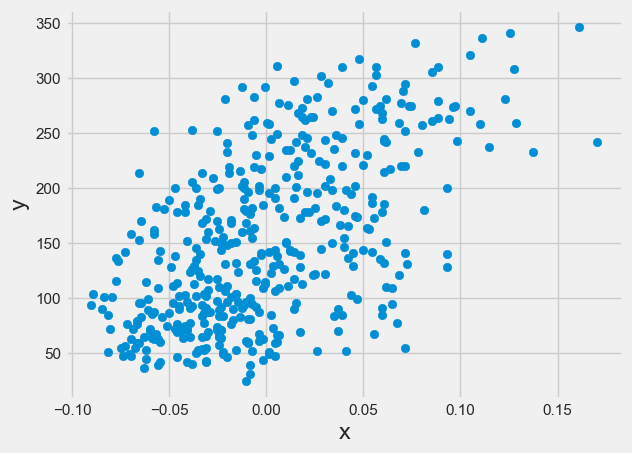

In [599]:
plt.scatter(diabetes.data[:,2], diabetes.target)
# [:,2]는 모든 행(:)과 3번째 열(2)의 값을 가져온 것(bmi)
plt.xlabel('x') # xlabel(그래프 밑에 행의 이름)의 이름을 x로 
plt.ylabel('y') # 위와 동
plt.show()

In [603]:
df = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
# diabetes.['feature_names'] : dictionary에서 key를 이용하여 value를 추출하는 방식
# diabetes.feature_names는 object에서 속성(attribute)을 이용하여 value를 추출하는 방식
df['target'] = diabetes.target
# 데이터를 'target'이라는 이름의 열로 추가하는 코드
# 데이터셋에는 feature 데이터와 target 데이터가 함께 저장
df.head()
# 첫 번쨰 샘플 당뇨병 진행도에 따라 1년 후의 당뇨병 진행도를 나타내는 수치 (151.0)
# 첫 번째 샘플에서 모든 feature 값들을 더한 값과 동일???? 값을 토대로 나온 혈당수치
# 무언가 공식이나 그런게 따로 있었나봄

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [604]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [606]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

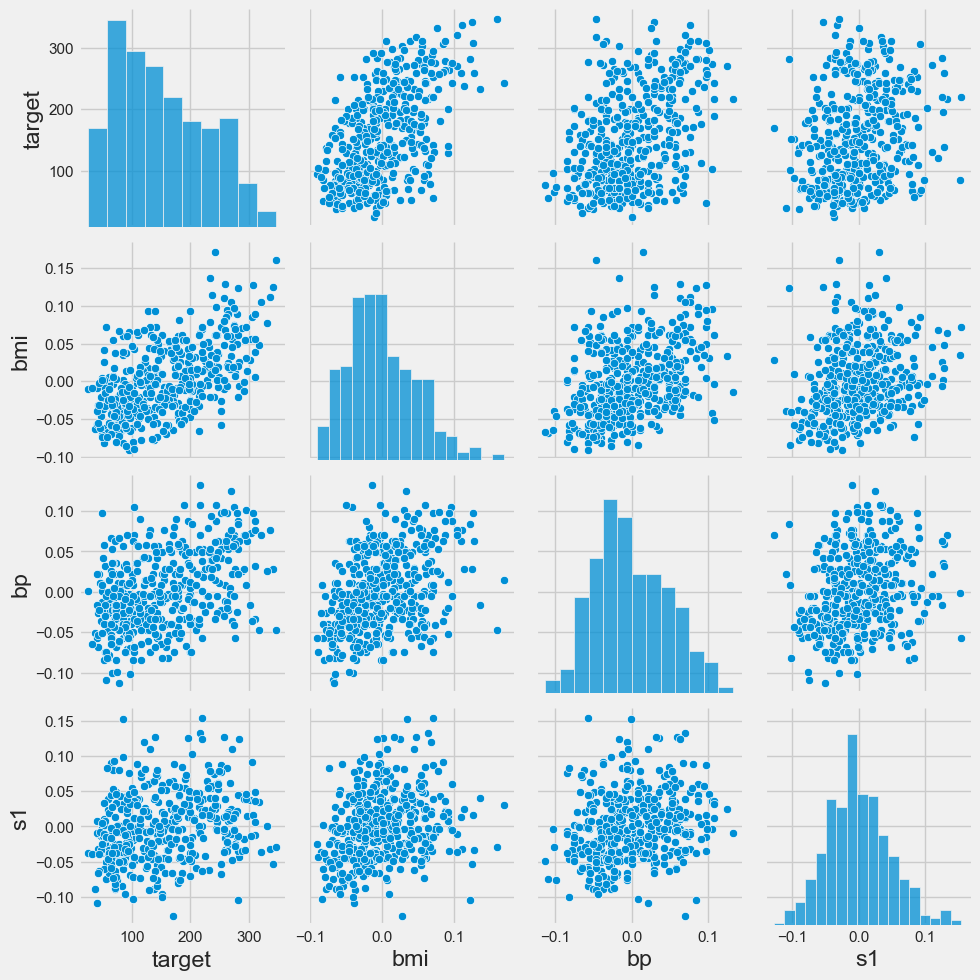

In [607]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
# df의 [["target", "bmi", "bp", "s1"]]만 사용하여 그래프 생성 4x4
plt.show()

In [608]:
df_corr = df.corr() # df.corr("bmi")와 같이 호출하면 'bmi' 열과 모든 열 간의 상관 관계를 계산
# corr 변수(열) 간의 상관관계를 계산하여 상관계수(correlation coefficient)를 반환
# 1에 가까울수록 양의 상관관계가 강하고, -1에 가까울수록 음의 상관관계가 강합니다.
# 0일 경우에는 상관관계가 없다
# 
df_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [609]:
cor_order = df_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)
# df_corr.loc[:'s6', 'target'] :
# 'target' feature와 's6' feature 사이의 correlation을 포함하여,
# 's6' feature까지의 correlation을 추출
# .abs() : 상관관계의 절대값을 계산
# .sort_values(ascending=False) : 상관관계의 크기를 기준으로 내림차순으로 정렬
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

상관계수가 0.5를 넘은 bmi와 s5를 대상으로 산점도와 회귀선을 그려보자.

In [610]:
names = ['target','bmi','s5']
diabetes_df = df.loc[:,names]

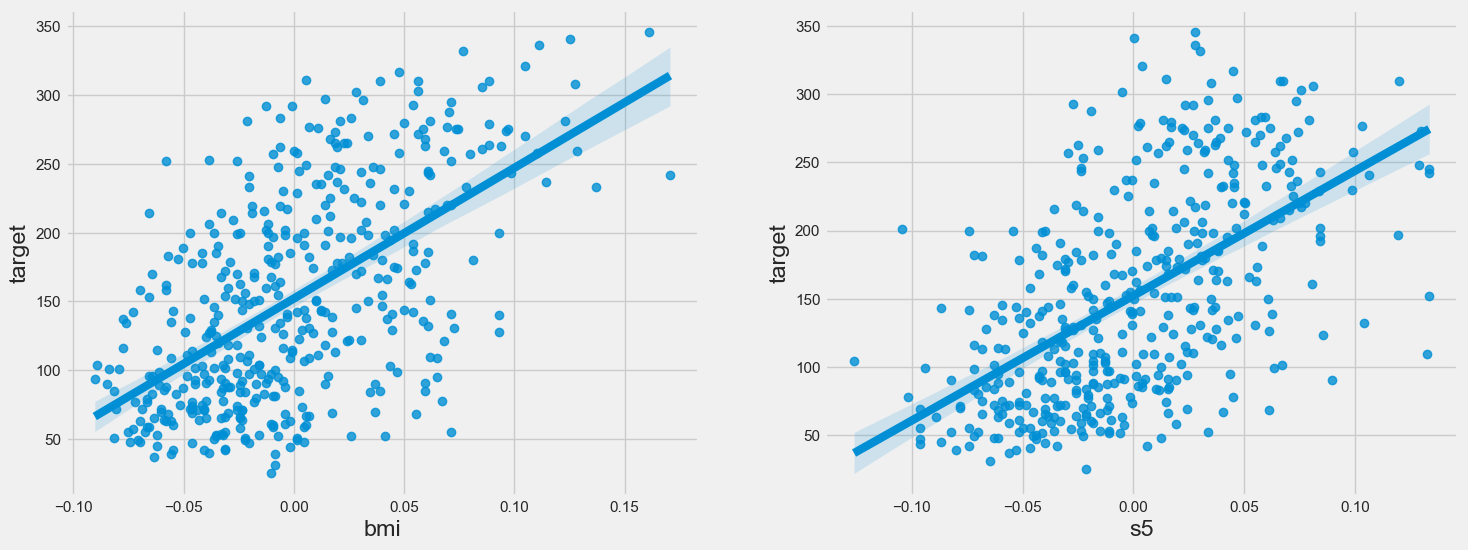

In [611]:
plt.figure(figsize=(16,6))
for i,name in enumerate(names[1:]):
    ax = plt.subplot(1,2,i+1)
    sns.regplot(x=name, y=names[0], data = diabetes_df,ax=ax)
plt.show()

In [612]:
from sklearn.model_selection import train_test_split

x_data=diabetes_df.loc[:, ['bmi', 's5']]
y_data=diabetes_df.loc[:, 'target']

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [613]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


In [614]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.4741054934306861

In [615]:
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

[696.73 604.62]
151.73


In [616]:
pred = lr.predict(X_test)

bmi prediction

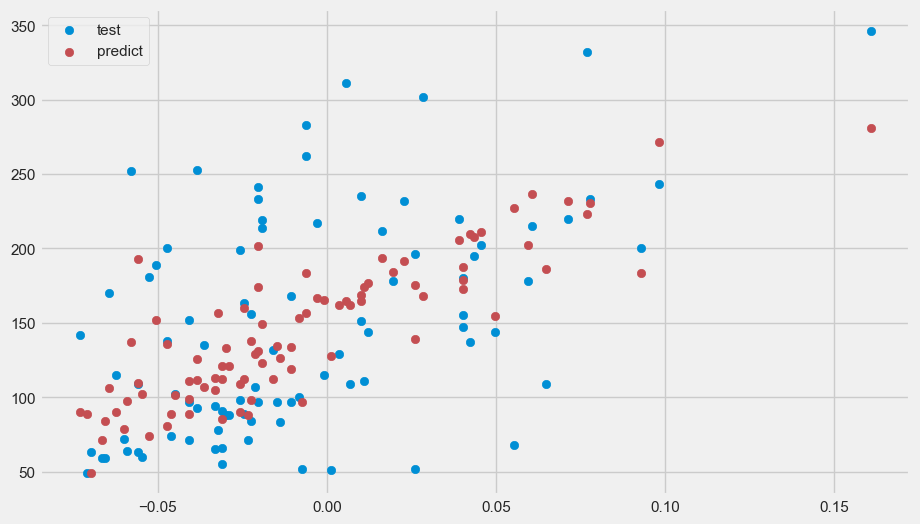

In [617]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

s5 prediction

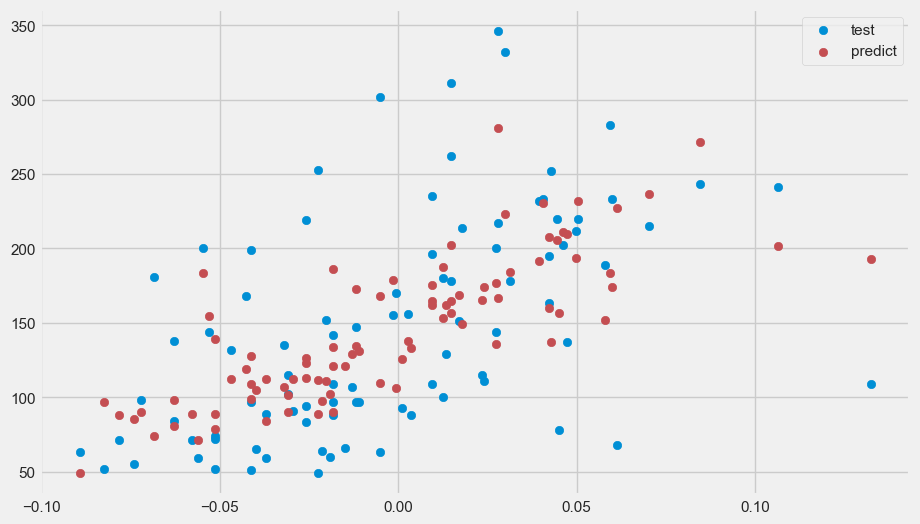

In [618]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

In [619]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)

In [620]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

train data set RMSE : 56.517
test data set RMSE : 57.045
